NGUYỄN VĂN QUỐC VIỆT 19522518
GIT: https://github.com/vietkitoo/lab6datamining.git

1. Text Normalization

In [ ]:
# import needed libraries
import nltk
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab/elonmusk_tweets.csv")

In [ ]:
df.shape

(2819, 3)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [ ]:
df.describe()


,id
count,2.819000e+03
mean,5.804848e+17
std,2.186404e+17
min,1.543473e+10
25%,3.506818e+17
50%,6.569719e+17
75%,7.704732e+17
max,8.496369e+17


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [ ]:
def normalize(document):
    # Remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    
    return ret

original_documents = [x.strip() for x in df['text']]
documents = [normalize(d).split() for d in original_documents]
documents[0]


['band', 'robot', 'spare', 'human', 'httpstcov7jujqwfcv']

In [ ]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens  
original_documents = [x.strip() for x in df['text']]
documents = [preprocess(d) for d in original_documents]

documents[1]

['b',
 '"',
 '@ForIn2020',
 '@waltmossberg',
 '@mims',
 '@defcon_5',
 'Exactly',
 '.',
 'Tesla',
 'is',
 'absurdly',
 'overvalued',
 'if',
 'based',
 'on',
 'the',
 'past',
 ',',
 'but',
 "that's",
 'irr',
 '\\',
 'xe2',
 '\\',
 'x80',
 '\\',
 'xa6',
 'https://t.co/qQcTqkzgMl',
 '"']

2. Implement TF-IDF 


In [ ]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import math

In [ ]:
#Flatten all the documents
flat_list = [word for doc in documents for word in doc]
#TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]
# TODO: we take the 500 most common words only
counts = Counter (words)
vocabulary = counts.most_common (500)
print([x for x in vocabulary if x[0] == 'Tesla']) 
vocabulary =  [x[0] for x in vocabulary]
assert len (vocabulary) == 500
#vocabulary.sort() 
vocabulary[:5]


[('Tesla', 272)]


['.', "'", 'b', '\\', '"']

In [ ]:
def idf(vocabulary, documents):
    idf_values = {}
    num_documents = len(documents)
    for term in vocabulary:
        count = sum(term in document for document in documents)
        idf_values[term] = math.log(num_documents / count, 2) 
    return idf_values

idf_values = idf(vocabulary, documents)
[idf_values[key] for key in vocabulary[:5]]

[0.959130577668125,
 0.7493007890060756,
 1.1177820471225408,
 3.1034157579523383,
 2.384152165519591]

3. Compare the results with the reference implementation of scikit-learn library.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

# Convert the list of documents into a single string
corpus = [' '.join(doc) for doc in documents]

stem_vectorizer = CountVectorizer(analyzer=stemmed_words)
print(stem_vectorizer.fit_transform(corpus))
print(stem_vectorizer.get_feature_names_out())

  (0, 617)	1
  (0, 6120)	1
  (0, 6614)	1
  (0, 5674)	1
  (0, 6187)	1
  (0, 3209)	1
  (0, 3203)	1
  (0, 1462)	1
  (0, 7107)	1
  (1, 6614)	1
  (1, 3203)	1
  (1, 1462)	1
  (1, 2667)	1
  (1, 7259)	1
  (1, 4285)	1
  (1, 1881)	1
  (1, 2392)	1
  (1, 6575)	1
  (1, 3489)	1
  (1, 403)	1
  (1, 4846)	1
  (1, 3278)	1
  (1, 897)	1
  (1, 4751)	1
  (1, 4936)	1
  :	:
  (2817, 2740)	1
  (2817, 3257)	1
  (2817, 5817)	1
  (2817, 3258)	1
  (2817, 1162)	1
  (2817, 7201)	1
  (2817, 5655)	1
  (2817, 7123)	1
  (2817, 4655)	1
  (2817, 5409)	1
  (2818, 3489)	1
  (2818, 6612)	1
  (2818, 6740)	1
  (2818, 6658)	1
  (2818, 441)	1
  (2818, 7272)	1
  (2818, 733)	1
  (2818, 4192)	2
  (2818, 924)	1
  (2818, 5190)	1
  (2818, 6907)	1
  (2818, 5056)	1
  (2818, 6144)	1
  (2818, 3282)	1
  (2818, 5168)	1
['00' '000' '01' ... 'zyfazr2bb2' 'zyv4h85o' 'zzijxxyy']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.metrics.pairwise import linear_kernel
tfidf = TfidfVectorizer (analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features=tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform (original_documents)

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words [0, idx]) for word, idx in tfidf.vocabulary_.items()]
print (sorted (words_freq, key = lambda x: x[1], reverse=True)[:5])
print('testla', corpus_tf_idf [1, features.vocabulary_['tesla']])


[('http', 163.54366542841234), ('https', 151.85039944652075), ('rt', 112.61998731390989), ('tesla', 95.96401470715628), ('xe2', 88.20944486346477)]
testla 0.3495243100660956


4. Apply TF-IDF for information retrieval 


In [ ]:
from nltk.stem import PorterStemmer
def cosine_similarity (v1, v2):

  sumxx, sumxy, sumyy = 0, 0, 0
  for i in range(len(v1)):
    x = v[i]; 
    y = v2[i]
    sumxx += x*x
    sumyy += y*y
    sumxy += x*y
  if sumxy == 0:
    result = 0
  else:
    result = sumxy/math.sqrt(sumxx*sumyy)
  return result

def search_vec (query, k, vocabulary, stemmer, document_vectors, original_documents):
  q= query.split()
  q = [stemmer.stem (w) for w in q]
  query_vector = vectorize(q, vocabulary, idf)
    # TODO: rank the documents by cosine similarity
  scores = [[cosine_similarity (query_vector, document_vectors[d]), d] for d in range(len(document_vectors))] 
  scores.sort(key=lambda x: -x[0])

  print('Top-{0} documents'.format(k))
  for i in range(k):
     print(i, original_documents [scores [i][1]])

query= "tesla nasa"
stemmer = PorterStemmer()
document_vectors=words_freq
search_vec(query, 5, vocabulary, stemmer, document_vectors, original_documents)


NameError: ignored

II. Text Processing 

1. Preprocessing

In [ ]:
import nltk
nltk.download('punkt') #Run this line one time to get the resource
nltk.download('stopwords') #Run this line one time to get the resource
nltk.download('wordnet') #Run this line one time to get the resource
nltk.download('averaged_perceptron_tagger') #Run this line one time to get the resource
import numpy as np
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab/coldplay.csv")

In [ ]:
df

,Artist,Song,Link,Lyrics
0,Coldplay,Another's Arms,/c/coldplay/anothers+arms_21079526.html,Late night watching tv \nUsed to be you here ...
1,Coldplay,Bigger Stronger,/c/coldplay/bigger+stronger_20032648.html,I want to be bigger stronger drive a faster ca...
2,Coldplay,Daylight,/c/coldplay/daylight_20032625.html,"To my surprise, and my delight \nI saw sunris..."
3,Coldplay,Everglow,/c/coldplay/everglow_21104546.html,"Oh, they say people come \nThey say people go..."
4,Coldplay,Every Teardrop Is A Waterfall,/c/coldplay/every+teardrop+is+a+waterfall_2091...,"I turn the music up, I got my records on \nI ..."
...,...,...,...,...
115,Coldplay,Hymn For The Weekend,/c/coldplay/hymn+for+the+weekend_21104544.html,"Oh, angel sent from up above \nYou know you m..."
116,Coldplay,In My Place,/c/coldplay/in+my+place_20032629.html,"In my place, in my place \nWere lines that I ..."
117,Coldplay,Ink,/c/coldplay/ink_21082518.html,"Got a tattoo that says ""2gether thru life"" \n..."
118,Coldplay,Ladder To The Sun,/c/coldplay/ladder+to+the+sun_20232934.html,From the very start \nIt came apart \nIt bro...


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  120 non-null    object
 1   Song    120 non-null    object
 2   Link    120 non-null    object
 3   Lyrics  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB
None


In [ ]:
song_title = 'Every Teardrop Is A Waterfall'
lyrics = df.loc[df['Song'] == song_title, 'Lyrics'].values[0]
print(lyrics)

I turn the music up, I got my records on  
I shut the world outside until the lights come on  
Maybe the streets alight, maybe the trees are gone  
I feel my heart start beating to my favourite song  
  
And all the kids they dance, all the kids all night  
Until Monday morning feels another life  
I turn the music up  
I'm on a roll this time  
And heaven is in sight  
  
I turn the music up, I got my records on  
From underneath the rubble sing a rebel song  
Don't want to see another generation drop  
I'd rather be a comma than a full stop  
  
Maybe I'm in the black, maybe I'm on my knees  
Maybe I'm in the gap between the two trapezes  
But my heart is beating and my pulses start  
Cathedrals in my heart  
  
As we saw oh this light I swear you, emerge blinking into  
To tell me it's alright  
As we soar walls, every siren is a symphony  
And every tear's a waterfall  
Is a waterfall  
Oh  
Is a waterfall  
Oh oh oh  
Is a is a waterfall  
Every tear  
Is a waterfall  
Oh oh oh  


In [ ]:
import nltk
import string


# Tokenize the lyrics
from nltk import word_tokenize
words = word_tokenize(lyrics)
print(words)


['I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', ',', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', ',', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', ',', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', ',', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'betwe

In [ ]:
tokens_without_punctuation = [token for token in words if token not in string.punctuation]

print(tokens_without_punctuation)

['I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'I', 'shut', 'the', 'world', 'outside', 'until', 'the', 'lights', 'come', 'on', 'Maybe', 'the', 'streets', 'alight', 'maybe', 'the', 'trees', 'are', 'gone', 'I', 'feel', 'my', 'heart', 'start', 'beating', 'to', 'my', 'favourite', 'song', 'And', 'all', 'the', 'kids', 'they', 'dance', 'all', 'the', 'kids', 'all', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'the', 'music', 'up', 'I', "'m", 'on', 'a', 'roll', 'this', 'time', 'And', 'heaven', 'is', 'in', 'sight', 'I', 'turn', 'the', 'music', 'up', 'I', 'got', 'my', 'records', 'on', 'From', 'underneath', 'the', 'rubble', 'sing', 'a', 'rebel', 'song', 'Do', "n't", 'want', 'to', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'be', 'a', 'comma', 'than', 'a', 'full', 'stop', 'Maybe', 'I', "'m", 'in', 'the', 'black', 'maybe', 'I', "'m", 'on', 'my', 'knees', 'Maybe', 'I', "'m", 'in', 'the', 'gap', 'between', 'the', 'two', 'trape

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
word_tokens = word_tokenize(lyrics)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in words if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(filtered_sentence)

['I', 'turn', 'music', ',', 'I', 'got', 'records', 'I', 'shut', 'world', 'outside', 'lights', 'come', 'Maybe', 'streets', 'alight', ',', 'maybe', 'trees', 'gone', 'I', 'feel', 'heart', 'start', 'beating', 'favourite', 'song', 'And', 'kids', 'dance', ',', 'kids', 'night', 'Until', 'Monday', 'morning', 'feels', 'another', 'life', 'I', 'turn', 'music', 'I', "'m", 'roll', 'time', 'And', 'heaven', 'sight', 'I', 'turn', 'music', ',', 'I', 'got', 'records', 'From', 'underneath', 'rubble', 'sing', 'rebel', 'song', 'Do', "n't", 'want', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'comma', 'full', 'stop', 'Maybe', 'I', "'m", 'black', ',', 'maybe', 'I', "'m", 'knees', 'Maybe', 'I', "'m", 'gap', 'two', 'trapezes', 'But', 'heart', 'beating', 'pulses', 'start', 'Cathedrals', 'heart', 'As', 'saw', 'oh', 'light', 'I', 'swear', ',', 'emerge', 'blinking', 'To', 'tell', "'s", 'alright', 'As', 'soar', 'walls', ',', 'every', 'siren', 'symphony', 'And', 'every', 'tear', "'s", 'waterfall', 'I

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_sentence]
print(lemmatized_tokens)

['I', 'turn', 'music', ',', 'I', 'got', 'record', 'I', 'shut', 'world', 'outside', 'light', 'come', 'Maybe', 'street', 'alight', ',', 'maybe', 'tree', 'gone', 'I', 'feel', 'heart', 'start', 'beating', 'favourite', 'song', 'And', 'kid', 'dance', ',', 'kid', 'night', 'Until', 'Monday', 'morning', 'feel', 'another', 'life', 'I', 'turn', 'music', 'I', "'m", 'roll', 'time', 'And', 'heaven', 'sight', 'I', 'turn', 'music', ',', 'I', 'got', 'record', 'From', 'underneath', 'rubble', 'sing', 'rebel', 'song', 'Do', "n't", 'want', 'see', 'another', 'generation', 'drop', 'I', "'d", 'rather', 'comma', 'full', 'stop', 'Maybe', 'I', "'m", 'black', ',', 'maybe', 'I', "'m", 'knee', 'Maybe', 'I', "'m", 'gap', 'two', 'trapeze', 'But', 'heart', 'beating', 'pulse', 'start', 'Cathedrals', 'heart', 'As', 'saw', 'oh', 'light', 'I', 'swear', ',', 'emerge', 'blinking', 'To', 'tell', "'s", 'alright', 'As', 'soar', 'wall', ',', 'every', 'siren', 'symphony', 'And', 'every', 'tear', "'s", 'waterfall', 'Is', 'waterfa

In [ ]:
from nltk import pos_tag
pos_tags = nltk.pos_tag(lemmatized_tokens)

print(pos_tags)

[('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), (',', ','), ('I', 'PRP'), ('got', 'VBD'), ('record', 'NN'), ('I', 'PRP'), ('shut', 'VBP'), ('world', 'NN'), ('outside', 'IN'), ('light', 'JJ'), ('come', 'VBP'), ('Maybe', 'NNP'), ('street', 'NN'), ('alight', 'NN'), (',', ','), ('maybe', 'RB'), ('tree', 'IN'), ('gone', 'VBN'), ('I', 'PRP'), ('feel', 'VBP'), ('heart', 'NN'), ('start', 'NN'), ('beating', 'VBG'), ('favourite', 'NN'), ('song', 'NN'), ('And', 'CC'), ('kid', 'NN'), ('dance', 'NN'), (',', ','), ('kid', 'VB'), ('night', 'NN'), ('Until', 'IN'), ('Monday', 'NNP'), ('morning', 'NN'), ('feel', 'NN'), ('another', 'DT'), ('life', 'NN'), ('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), ('I', 'PRP'), ("'m", 'VBP'), ('roll', 'JJ'), ('time', 'NN'), ('And', 'CC'), ('heaven', 'JJ'), ('sight', 'NN'), ('I', 'PRP'), ('turn', 'VBP'), ('music', 'NN'), (',', ','), ('I', 'PRP'), ('got', 'VBD'), ('record', 'NN'), ('From', 'IN'), ('underneath', 'JJ'), ('rubble', 'JJ'), ('sing', 'VBG'), ('rebel', 'NN')

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    output = np.asarray(pos_tag)
    for i in range(len(pos_tag)):
        if pos_tag[i][1].startswith('J'):
            output[i][1] = wordnet.ADJ
        elif pos_tag[i][1].startswith('V'):
            output[i][1] = wordnet.VERB
        elif pos_tag[i][1].startswith('R'):
            output[i][1] = wordnet.ADV
        else:
            output[i][1] = wordnet.NOUN
    return output

2. Bag-of-words

In [ ]:
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab/coldplay.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  120 non-null    object
 1   Song    120 non-null    object
 2   Link    120 non-null    object
 3   Lyrics  120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB
None


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(df['Lyrics'])

print( bow.shape)

(120, 1776)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe from the BOW matrix and feature names
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)

bow_df


,10,2000,2gether,76543,aaaaaah,aaaaah,aaaah,about,above,achin,...,yellow,yes,yesterday,yet,you,young,your,yours,yourself,yuletide
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,4,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,3,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
117,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,7,0,4,0,0,0
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,16,0,1,0,0,0


In [ ]:
sum_bow = bow_df.sum()
sum_bow.idxmax()

'you'

In [ ]:
word_counts = bow_df.sum()
top_10_words = word_counts.nlargest(10)

# Print the top 10 words
print(top_10_words)

you    994
the    777
and    650
to     481
it     458
oh     334
in     318
me     314
my     288
on     285
dtype: int64


III. Text Similarity

1.. Similarity metrics


In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
A = "Outside the classroom, Stallman pursued his studies with even more diligence, rushing off to fulfill his laboratory-assistant duties at Rockefeller University during the week and dodging the Vietnam protesters on his way to Saturday school at Columbia. It was there, while the rest of the Science Honors Program students sat around discussing their college choices, that Stallman finally took a moment to participate in the preclass bull session."
B = "To facilitate the process, AI Lab hackers had built a system that displayed both the source and display modes on a split screen. Despite this innovative hack, switching from mode to mode was still a nuisance."
C = "With no dorm and no dancing, Stallman's social universe imploded. Like an astronaut experiencing the aftereffects of zero-gravity, Stallman found that his ability to interact with nonhackers, especially female nonhackers, had atrophied significantly. After 16 weeks in the AI Lab, the self confidence he'd been quietly accumulating during his 4 years at Harvard was virtually gone."

In [ ]:
set_A = set(A.lower().split())
set_B = set(B.lower().split())
set_C = set(C.lower().split())

# Compute the intersection and union
intersection_AB = len(set_A.intersection(set_B))
union_AB = len(set_A.union(set_B))

intersection_AC = len(set_A.intersection(set_C))
union_AC = len(set_A.union(set_C))

intersection_BC = len(set_B.intersection(set_C))
union_BC = len(set_B.union(set_C))

# Compute and print the Jaccard Similarity
jaccard_AB = intersection_AB / union_AB
jaccard_AC = intersection_AC / union_AC
jaccard_BC = intersection_BC / union_BC

print("Jaccard Similarity between A and B:", jaccard_AB)
print("Jaccard Similarity between A and C:", jaccard_AC)
print("Jaccard Similarity between B and C:", jaccard_BC)

Jaccard Similarity between A and B: 0.08641975308641975
Jaccard Similarity between A and C: 0.12631578947368421
Jaccard Similarity between B and C: 0.0945945945945946


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF for sentences A, B, and C
tfidf = vectorizer.fit_transform([A, B, C])

# Calculate cosine similarities
cosine_sim_AB = cosine_similarity(tfidf[0], tfidf[1])
cosine_sim_BC = cosine_similarity(tfidf[1], tfidf[2])
cosine_sim_AC = cosine_similarity(tfidf[0], tfidf[2])

# Print cosine similarities
print("cos(A, B):", cosine_sim_AB)
print("cos(B, C):", cosine_sim_BC)
print("cos(A, C):", cosine_sim_AC)

cos(A, B): [[0.1679327]]
cos(B, C): [[0.13618963]]
cos(A, C): [[0.2850296]]


2. TF-IDF

In [ ]:
import nltk
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab/headlines.csv")

In [ ]:
df.head()

,publish_date,headline_text
0,20170721,algorithms can make decisions on behalf of fed...
1,20170721,andrew forrests fmg to appeal pilbara native t...
2,20170721,a rural mural in thallan
3,20170721,australia church risks becoming haven for abusers
4,20170721,australian company usgfx embroiled in shanghai...


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   1999 non-null   int64 
 1   headline_text  1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB
None


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import string
df['tokens'] = df['headline_text'].apply(lambda x: word_tokenize(x))

# Remove punctuation
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token not in string.punctuation])

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

# Join tokens back into a single string
df['Stem'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['tokens']

0         [algorithm, make, decis, behalf, feder, minist]
1       [andrew, forrest, fmg, appeal, pilbara, nativ,...
2                                 [rural, mural, thallan]
3                  [australia, church, risk, becom, abus]
4       [australian, compani, usgfx, embroil, shanghai...
                              ...                        
1994    [constitut, avenu, win, top, prize, act, archi...
1995                         [dark, mofo, number, crunch]
1996    [david, petraeu, say, australia, must, firm, s...
1997    [driverless, car, australia, face, challeng, r...
1998               [drug, compani, criticis, price, hike]
Name: tokens, Length: 1999, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['tokens'])
bow = vectorizer.transform(df['tokens'])

print(bow.shape)

(1999, 4271)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer=lambda x: x)

vectorizer.fit(df['Stem'])


tfidf = vectorizer.transform(df['Stem'])

tfidf_array = tfidf.toarray()

all_zeros = (tfidf_array == 0).all()

if not all_zeros:
    print(tfidf_array[0])

[0.3943827  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.24444796 0.12987231 0.10011226 0.21470886 0.40884261 0.29023513
 0.12972179 0.23484967 0.34095845 0.         0.15309538 0.18376484
 0.32930567 0.08609939 0.08749485 0.         0.         0.16659404
 0.18357889 0.17297874 0.         0.         0.         0.
 0.         0.        ]


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer=lambda x: x)


vectorizer.fit(df['tokens'])


tfidf = vectorizer.transform(df['tokens'])


tfidf_array = tfidf.toarray()


average_tfidf = np.mean(tfidf_array, axis=0)


highest_indices = np.argsort(-average_tfidf)[:10]  # Use negative sign for descending order
lowest_indices = np.argsort(average_tfidf)[:10]

feature_names = vectorizer.get_feature_names_out()


print("Words with the highest average TF-IDF:")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])


print("\nWords with the lowest average TF-IDF:")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])

Words with the highest average TF-IDF:
australia 0.009983014998891405
australian 0.00969733014866161
new 0.008703107457097207
polic 0.0077360592047481126
say 0.007540459757782178
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829903
sydney 0.0056424159732095394

Words with the lowest average TF-IDF:
nmfc 0.0001527054029533165
coll 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
adel 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
gw 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.0001613676677950104


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer



documents = df['tokens'].apply(lambda x: ' '.join(x))


vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(documents)

In [ ]:
import numpy as np

# Assuming you have computed the TF-IDF representation and stored it in 'tfidf'

# Compute the average TF-IDF values for each feature (word)
average_tfidf = np.mean(tfidf.toarray(), axis=0)

# Get the indices of the words with the highest and lowest average TF-IDF values
highest_indices = np.argsort(-average_tfidf)[:10]  # Use negative sign for descending order
lowest_indices = np.argsort(average_tfidf)[:10]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Print the words with the highest average TF-IDF values
print("Words with the highest average TF-IDF:")
for index in highest_indices:
    print(feature_names[index], average_tfidf[index])

# Print the words with the lowest average TF-IDF values
print("\nWords with the lowest average TF-IDF:")
for index in lowest_indices:
    print(feature_names[index], average_tfidf[index])


Words with the highest average TF-IDF:
australia 0.009983014998891405
australian 0.009729510942149733
new 0.008703107457097207
polic 0.007736059204748111
say 0.007555848605072935
trump 0.006840891998202155
man 0.006548453421337382
wa 0.006274671593818188
charg 0.006028832916829904
sydney 0.005659788840016151

Words with the lowest average TF-IDF:
adel 0.0001527054029533165
melb 0.0001527054029533165
haw 0.0001527054029533165
coll 0.0001527054029533165
gw 0.0001527054029533165
syd 0.0001527054029533165
gcfc 0.0001527054029533165
nmfc 0.0001527054029533165
geel 0.0001527054029533165
fabio 0.00016136766779501044


3. Plagiarism checker 


In [ ]:
file = open('/content/drive/MyDrive/Colab/A1.txt', 'r') 
A1 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/Asource.txt', 'r') 
A0 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/B1.txt', 'r') 
B1 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/Bsource.txt', 'r') 
B0 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/C1.txt', 'r') 
C1 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/Csource.txt', 'r') 
C0 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/D1.txt', 'r') 
D1 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/D2.txt', 'r') 
D2 = file.readlines()[0]

file = open('/content/drive/MyDrive/Colab/Dsource.txt', 'r') 
D0 = file.readlines()[0]

In [ ]:
C0

'Descartes has been heralded as the first modern philosopher. He is famous for having made an important connection between geometry and algebra, which allowed for the solving of geometrical problems by way of algebraic equations. He is also famous for having promoted a new conception of matter, which allowed for the accounting of physical phenomena by way of mechanical explanations. However, he is most famous for having written a relatively short work, Meditationes de Prima Philosophia (Meditations On First Philosophy), published in 1641, in which he provides a philosophical groundwork for the possibility of the sciences. (Smith, 2007).\n'

In [ ]:
alldata = [A0, A1, B0, B1, C0, C1, D0, D1, D2]

In [ ]:
#TODO: Compute tf-idf for all documents
from sklearn.feature_extraction.text import TfidfVectorizer

tfvect = TfidfVectorizer()
tfvect.fit(alldata)


tfidf = tfvect.fit_transform(alldata).toarray()
# Compute the TF-IDF representation for each document
TFIDFA = tfvect.transform([A0, A1]).toarray()
TFIDFB = tfvect.transform([B0, B1]).toarray()
TFIDFC = tfvect.transform([C0, C1]).toarray()
TFIDFD = tfvect.transform([D0, D1, D2]).toarray()



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise similarity for document A
similarityAA = cosine_similarity(TFIDFA, TFIDFA)

# Compute pairwise similarity for document B
similarityBB = cosine_similarity(TFIDFB, TFIDFB)

# Compute pairwise similarity for document C
similarityCC = cosine_similarity(TFIDFC, TFIDFC)

# Compute pairwise similarity for document D
similarityDD = cosine_similarity(TFIDFD, TFIDFD)

# Compute pairwise similarity for all documents
similarityAll = cosine_similarity(tfidf, tfidf)

In [ ]:
similarityAA

array([[1.        , 0.81898863],
       [0.81898863, 1.        ]])

In [ ]:
similarityBB

array([[1.        , 0.63747903],
       [0.63747903, 1.        ]])

In [ ]:
similarityCC

array([[1.        , 0.85723864],
       [0.85723864, 1.        ]])

In [ ]:
similarityDD

array([[1.        , 0.92754461, 0.45775827],
       [0.92754461, 1.        , 0.47179638],
       [0.45775827, 0.47179638, 1.        ]])

In [ ]:
similarityAll

array([[1.        , 0.81898863, 0.10748497, 0.12736224, 0.24491604,
        0.29501242, 0.2530779 , 0.2146434 , 0.18585492],
       [0.81898863, 1.        , 0.10940658, 0.12644471, 0.21239125,
        0.25583485, 0.214717  , 0.17937458, 0.16807197],
       [0.10748497, 0.10940658, 1.        , 0.63747903, 0.08804551,
        0.09372089, 0.08509508, 0.07946359, 0.10627147],
       [0.12736224, 0.12644471, 0.63747903, 1.        , 0.08730757,
        0.08893992, 0.12527568, 0.1207279 , 0.12910021],
       [0.24491604, 0.21239125, 0.08804551, 0.08730757, 1.        ,
        0.85723864, 0.20151171, 0.16200275, 0.14447728],
       [0.29501242, 0.25583485, 0.09372089, 0.08893992, 0.85723864,
        1.        , 0.22326634, 0.1806631 , 0.1558733 ],
       [0.2530779 , 0.214717  , 0.08509508, 0.12527568, 0.20151171,
        0.22326634, 1.        , 0.92754461, 0.45775827],
       [0.2146434 , 0.17937458, 0.07946359, 0.1207279 , 0.16200275,
        0.1806631 , 0.92754461, 1.        , 0.47179638],


In [ ]:
import numpy as np

# Initialize the true labels matrix
real_plagiarism = np.zeros((9, 9))

# Set the true labels for plagiarized pairs
real_plagiarism[0:2, 0:2] = 1  # A0 and A1 are plagiarized
real_plagiarism[2:4, 2:4] = 1  # B0 and B1 are plagiarized
real_plagiarism[4:6, 4:6] = 1  # C0 and C1 are plagiarized
real_plagiarism[6:9, 6:9] = 1  # D0, D1, and D2 are plagiarized

# Print the true labels matrix
print(real_plagiarism)


[[1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]]


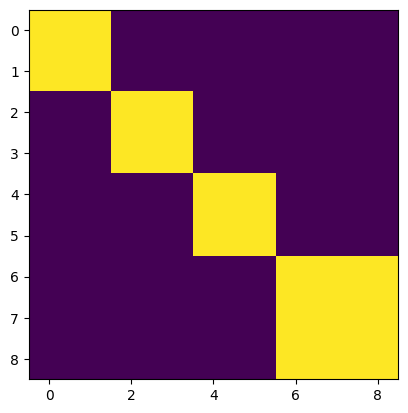

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(real_plagiarism)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert similarity matrix to binary predictions
threshold = 0.5
binary_predictions_All = (similarityAll > threshold).astype(int).flatten()

# Convert true labels matrix to binary labels
true_labels = real_plagiarism.flatten()

# Compute accuracy score
accuracy_All = accuracy_score(true_labels, binary_predictions_All)

print("Accuracy for All Documents:", accuracy_All)


Accuracy for All Documents: 0.9506172839506173


III. Text Classification 

In [ ]:
# Import NLTK and all the needed libraries
import nltk
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab/spam.csv', encoding='latin-1')

# Display the first few rows of the dataframe
print(df.head())


  Class                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define the preprocess_text function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens_lower = [token.lower() for token in tokens]
    
    # Stopword Removal
    stop_words = set(stopwords.words('english'))  # Specify 'latin-1' stopwords
    tokens_no_stopwords = [token for token in tokens_lower if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(token) for token in tokens_no_stopwords]
    
    # Return preprocessed tokens as a string
    return ' '.join(tokens_stemmed)

df['preprocessed_text'] = df['Message'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['preprocessed_text']

0       go jurong point , crazi .. avail bugi n great ...
1                           ok lar ... joke wif u oni ...
2       free entri 2 wkli comp win fa cup final tkt 21...
3             u dun say earli hor ... u c alreadi say ...
4              nah n't think goe usf , live around though
                              ...                        
5567    2nd time tri 2 contact u. u ï¿½750 pound prize...
5568                         ï¿½_ b go esplanad fr home ?
5569                        piti , * mood . ... suggest ?
5570    guy bitch act like 'd interest buy someth els ...
5571                                     rofl . true name
Name: preprocessed_text, Length: 5572, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(df['preprocessed_text'])

print( bow.shape)

(5572, 7495)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer



# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe from the BOW matrix and feature names
bow_df = pd.DataFrame(bow.toarray(), columns=feature_names)

bow_df

,00,000,000pe,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,½t,½te,½v,½wel,½ï,½û,½ûªm,½ûªt,½ûªv,ì¼1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
